# Introduction

This is the file for the Msc Machine learning coursework using autotrader data. 

To start we will load and clean the data read for use
second we will move onto to classification 
then regression and finally a conculsion. 

Throughout explanations in cells like this will appear to walk through my decisions 


# Classification


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import(
    mean_absolute_error,
    mean_squared_error
)
from functools import partial
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor


In [ ]:
CarDataClass = pd.read_csv("/content/drive/MyDrive/MSC data/7v0015-cw-classification-adverts.csv")
CarDataReg = pd.read_csv("/content/drive/MyDrive/MSC data/7v0015-cw-regression-adverts.csv")

Above we load in the files from my personal drive, these paths will probably need to be changed as my drive is private.

Below we display the basic data in each csv


## Data Preperation and cleaning

To start with we display the data to see what columns we have in the data set and understand what the data we have been given is

In [ ]:
CarDataClass

mileage  standard_make standard_model  ... fuel_type age price_band
0       31534           MINI          Hatch  ...    Petrol   5       high
1       52023     Volkswagen           Golf  ...    Diesel   6       high
2       29500  Mercedes-Benz        C Class  ...    Petrol  10     medium
3       35300       Vauxhall          Corsa  ...    Petrol   4     medium
4       47299         Nissan        Qashqai  ...    Diesel   6       high
...       ...            ...            ...  ...       ...  ..        ...
96264   28225  Mercedes-Benz        C Class  ...    Diesel   5       high
96265  122000            BMW       3 Series  ...    Petrol  15        low
96266   45000       Vauxhall          Corsa  ...    Petrol   7     medium
96267    4075         Nissan           Juke  ...    Petrol   3       high
96268   52760         Nissan        Qashqai  ...    Petrol  10     medium

[96269 rows x 8 columns]

Next is the cleaning of the data provided. We will remove cells deemed inconsequential:
make_model - this is a repeated values 
Crossover_car_and_van - after the checks below we see these are all false and therefore not needed
public_reference - is not needed either for the same reason as above
I will be removing reg_code becasue although the plate system in the uk shows which half of the year a car was built, i.e 15 = first half of 2015 and 65 the latter half some customers may be unaware of this, therefore it is wiser to keep the year column and remove the reg code column

my justification for removal of these columns changes. we remove condition as all vehicles are used and therefore we can just assume this value to always be used.
I removed colour as well becasue, I have a huge passion for cars and I know from personal knowledge the colour itself does not effect price. if the type of paint i.e. metallic, gloss, matte etc was specified then this would have an effect, furthermore brands like porsche and BMW have special colours such as miami blue and laguna seca blue which are heritage colours which also grant a increase price. again if these were represented it would be crucial to keep

In [ ]:
CarDataClass['price_band'].value_counts(dropna=False)


high         41651
medium       38340
very high    12353
low           3925
Name: price_band, dtype: int64

In [ ]:
CarDataClass = CarDataClass.drop(columns = ['make_model', 'crossover_car_and_van' ,'public_reference', 'reg_code','vehicle_condition', 'standard_colour'])

In [ ]:
CarDataClass.groupby(['standard_model', 'price_band']).size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f52b0292b50>>

In [ ]:
CarDataClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96269 entries, 0 to 96268
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mileage               96247 non-null  float64
 1   standard_make         96269 non-null  object 
 2   standard_model        96269 non-null  object 
 3   year_of_registration  96269 non-null  float64
 4   body_type             96269 non-null  object 
 5   fuel_type             96269 non-null  object 
 6   age                   96269 non-null  int64  
 7   price_band            96269 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 5.9+ MB


As we are doing classification we need to re assign variable types for important numeric values such as milage, age and year of registration.

Setting them to object allows them be used properly with the models later on

In [ ]:

CarDataClass['age'].astype(object)
CarDataClass['year_of_registration'].astype(object)
CarDataClass['mileage'].astype(object)

0         31534
1         52023
2         29500
3         35300
4         47299
          ...  
96264     28225
96265    122000
96266     45000
96267      4075
96268     52760
Name: mileage, Length: 96269, dtype: object

In [ ]:
CarDataClass = CarDataClass.assign(mileage = CarDataClass['mileage'].astype(object))
CarDataClass = CarDataClass.assign(age = CarDataClass['age'].astype(object))
CarDataClass = CarDataClass.assign(year_of_registration = CarDataClass['year_of_registration'].astype(object))

In [ ]:
CarDataClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96269 entries, 0 to 96268
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   mileage               96247 non-null  object
 1   standard_make         96269 non-null  object
 2   standard_model        96269 non-null  object
 3   year_of_registration  96269 non-null  object
 4   body_type             96269 non-null  object
 5   fuel_type             96269 non-null  object
 6   age                   96269 non-null  object
 7   price_band            96269 non-null  object
dtypes: object(8)
memory usage: 5.9+ MB


In [ ]:
SmallCarDat = CarDataClass.sample(100)
SmallCarDat.head()

mileage  standard_make standard_model  ... fuel_type age price_band
62346   44000       Vauxhall          Corsa  ...    Petrol   8     medium
38413   65000       Vauxhall          Corsa  ...    Diesel   2     medium
37617   17585  Mercedes-Benz        A Class  ...    Petrol   4  very high
66031   96000           Audi             A3  ...    Petrol  13     medium
15068   47000  Mercedes-Benz        A Class  ...    Diesel   7       high

[5 rows x 8 columns]

Time to visualise the data so we can decide the best approach now that we have cleaned the data.

In [ ]:

SmallCarDat['standard_model'].value_counts(dropna=False)


A Class     15
Golf         9
Astra        7
A3           6
1 Series     6
Hatch        6
A1           6
Corsa        6
3 Series     5
C Class      5
Qashqai      5
5 Series     4
Juke         4
E Class      3
Yaris        3
Polo         3
500          3
Clio         2
Sportage     2
Name: standard_model, dtype: int64

I used some catplots with the remaining features against the price band to understand the distrubtion in the sample data set, we can see the the majority of the cars are either medium or high priced therefore these are our two priority areas to get high scores. which we can see in a confusion matrices.

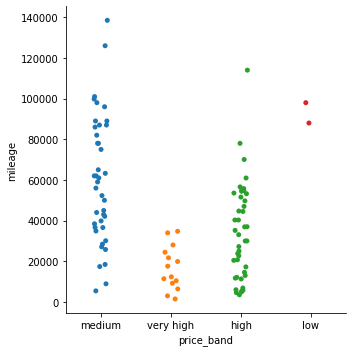

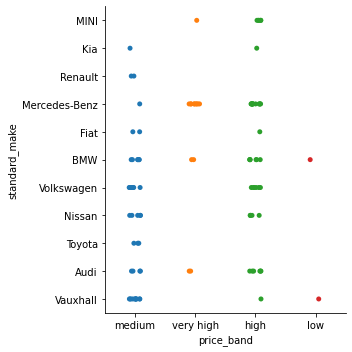

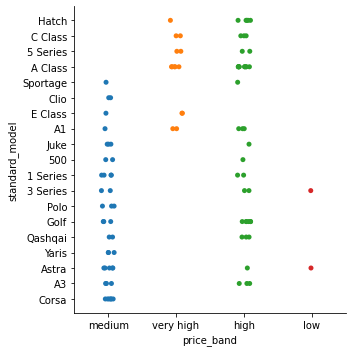

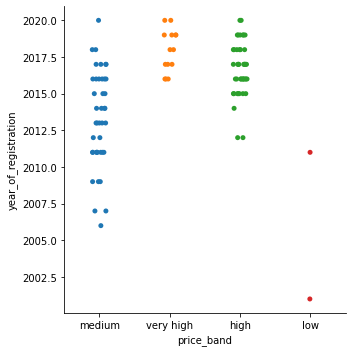

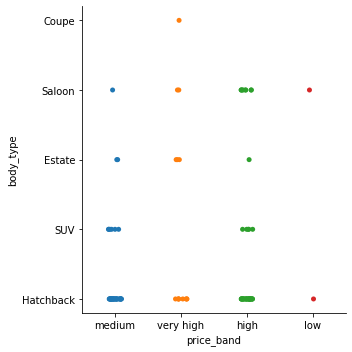

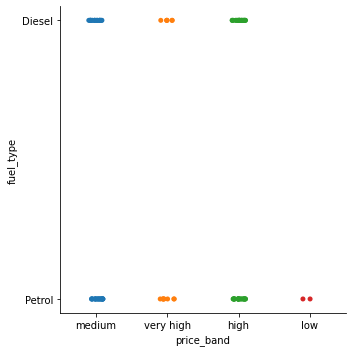

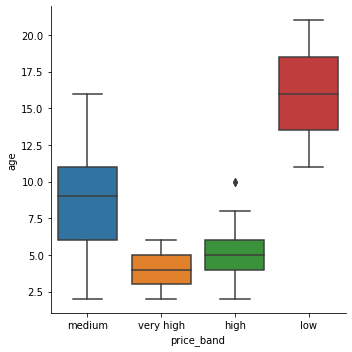

In [ ]:
sns.catplot(data=SmallCarDat, x = 'price_band', y= 'mileage')
plt.show()
sns.catplot(data=SmallCarDat, x = 'price_band', y = 'standard_make')
plt.show()
sns.catplot(data=SmallCarDat, x = 'price_band', y = 'standard_model')
plt.show()
sns.catplot(data=SmallCarDat, x = 'price_band', y= 'year_of_registration')
plt.show()
sns.catplot(data=SmallCarDat, x = 'price_band', y= 'body_type')
plt.show()
sns.catplot(data=SmallCarDat, x = 'price_band' ,y= 'fuel_type')
plt.show()
sns.catplot(data=SmallCarDat, x = 'price_band', y = 'age', kind = 'box')
plt.show()





Now we go onto the modelling, I will be following the labs that we did as a basis for the majority of my work. to start with getting the dummies of the data and preparing it for the testing splits.

## Models
I have opted to use four models to evaluate the best ones to use. 
the first model is K nearest neighbour, this methods tends to plot the data into a graph and then assign a value based on those around it. for example if you set the parameters to 5 it will look at the 5 nearest, 10 would be the 10 nearest etc. 

In [ ]:
sampleDat = CarDataClass.sample(10000)
CarClass_y = sampleDat['price_band']
sampleDat = pd.get_dummies(sampleDat)
sampleDat.head()

mileage_0.0  mileage_1.0  ...  price_band_medium  price_band_very high
68019            0            0  ...                  1                     0
34519            0            0  ...                  1                     0
71489            0            0  ...                  1                     0
75873            0            0  ...                  0                     0
16286            0            0  ...                  0                     1

[5 rows x 6673 columns]

In terms of assesing the value of a car it is important to keep the make, model and body type of a car as these affect the prices so although this data set generates a lot of columns it is important to keep.

In [ ]:

CarClass_x = sampleDat.drop(columns = ['price_band_high', 'price_band_medium', 'price_band_low', 'price_band_very high'])
CarClass_x_train, CarClass_x_test, CarClass_y_train, CarClass_y_test = train_test_split(CarClass_x, CarClass_y, test_size=0.20, random_state= 66,
            stratify=CarClass_y                                                                            )
CarClass_x_train.shape, CarClass_y_train.shape, CarClass_x_test.shape, CarClass_y_test.shape

((8000, 6669), (8000,), (2000, 6669), (2000,))

In [ ]:
CarClass_x_train.value_counts(normalize=True)

mileage_0.0  mileage_1.0  mileage_2.0  mileage_4.0  mileage_5.0  mileage_6.0  mileage_7.0  mileage_8.0  mileage_9.0  mileage_10.0  mileage_11.0  mileage_12.0  mileage_14.0  mileage_15.0  mileage_16.0  mileage_17.0  mileage_18.0  mileage_19.0  mileage_20.0  mileage_22.0  mileage_25.0  mileage_27.0  mileage_29.0  mileage_30.0  mileage_31.0  mileage_40.0  mileage_45.0  mileage_49.0  mileage_50.0  mileage_53.0  mileage_59.0  mileage_63.0  mileage_76.0  mileage_87.0  mileage_99.0  mileage_100.0  mileage_101.0  mileage_110.0  mileage_123.0  mileage_138.0  mileage_150.0  mileage_151.0  mileage_200.0  mileage_214.0  mileage_216.0  mileage_224.0  mileage_232.0  mileage_256.0  mileage_279.0  mileage_326.0  mileage_329.0  mileage_398.0  mileage_412.0  mileage_442.0  mileage_466.0  mileage_500.0  mileage_529.0  mileage_547.0  mileage_550.0  mileage_562.0  mileage_569.0  mileage_611.0  mileage_612.0  mileage_618.0  mileage_647.0  mileage_689.0  mileage_692.0  mileage_702.0  mileage_784.0  mileage_7

In [ ]:
dummyc = DummyClassifier()
dummyc.fit(CarClass_x_train, CarClass_y_train)

DummyClassifier()

In [ ]:
dummyc_acc_train = accuracy_score(CarClass_y_train, dummyc.predict(CarClass_x_train))
dummyc_bacc_train = balanced_accuracy_score(CarClass_y_train, dummyc.predict(CarClass_x_train))
dummyc_acc_test = accuracy_score(CarClass_y_test, dummyc.predict(CarClass_x_test))
dummyc_bacc_test = balanced_accuracy_score(CarClass_y_test, dummyc.predict(CarClass_x_test))

In [ ]:
dummyc_scores_df = pd.DataFrame(
    dict(
        micro_acc_train=dummyc_acc_train,
        macro_acc_train=dummyc_bacc_train,
        micro_acc_test=dummyc_acc_test,
        macro_acc_test=dummyc_bacc_test
    ), 
    index=['Dummy']
)
dummyc_scores_df

micro_acc_train  macro_acc_train  micro_acc_test  macro_acc_test
Dummy         0.438375             0.25          0.4385            0.25

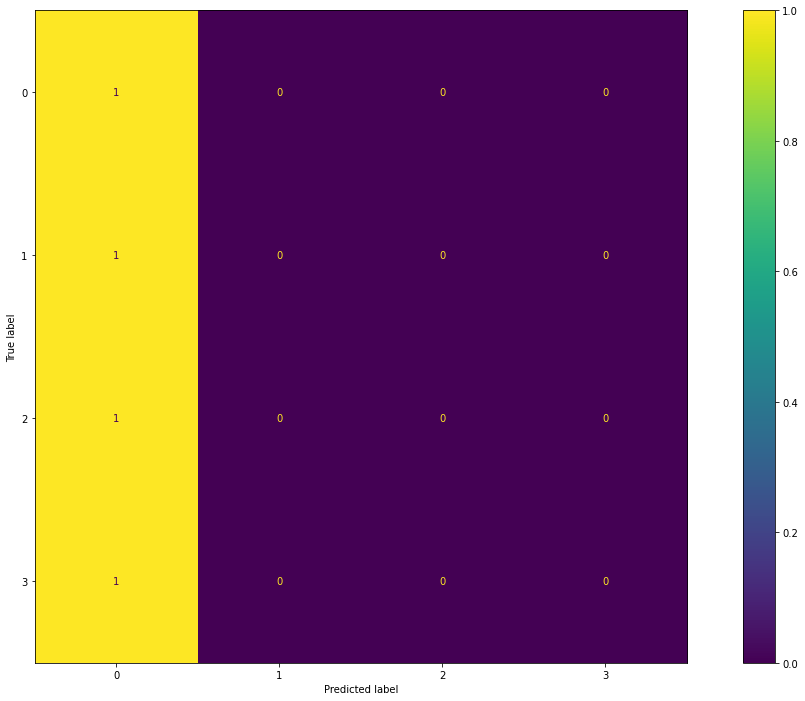

In [ ]:
cm = confusion_matrix(
    CarClass_y_test, dummyc.predict(CarClass_x_test), normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### KNN



In [ ]:
MinMaxScaler().fit_transform(CarClass_x_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# fit/evaluate: kNN 5 uniform
knnc_5u = KNeighborsClassifier(5, weights='uniform')
knnc_5u = Pipeline([('scaler', StandardScaler()), ('model', knnc_5u)])
knnc_5u.fit(CarClass_x_train, CarClass_y_train)
knnc_5u_acc_train = accuracy_score(CarClass_y_train, knnc_5u.predict(CarClass_x_train))
knnc_5u_bacc_train = balanced_accuracy_score(CarClass_y_train, knnc_5u.predict(CarClass_x_train))
knnc_5u_acc_test = accuracy_score(CarClass_y_test, knnc_5u.predict(CarClass_x_test))
knnc_5u_bacc_test = balanced_accuracy_score(CarClass_y_test, knnc_5u.predict(CarClass_x_test))

# fit/evaluate: kNN 5 distance
knnc_5d = KNeighborsClassifier(5, weights='distance')
knnc_5d = Pipeline([('scaler', StandardScaler()), ('model', knnc_5d)])
knnc_5d.fit(CarClass_x_train, CarClass_y_train)
knnc_5d_acc_train = accuracy_score(CarClass_y_train, knnc_5d.predict(CarClass_x_train))
knnc_5d_bacc_train = balanced_accuracy_score(CarClass_y_train, knnc_5d.predict(CarClass_x_train))
knnc_5d_acc_test = accuracy_score(CarClass_y_test, knnc_5d.predict(CarClass_x_test))
knnc_5d_bacc_test = balanced_accuracy_score(CarClass_y_test, knnc_5d.predict(CarClass_x_test))

# fit/evaluate: kNN 8 uniform
knnc_11u = KNeighborsClassifier(15, weights='uniform')
knnc_11u = Pipeline([('scaler', StandardScaler()), ('model', knnc_11u)])
knnc_11u.fit(CarClass_x_train, CarClass_y_train)
knnc_11u_acc_train = accuracy_score(CarClass_y_train, knnc_11u.predict(CarClass_x_train))
knnc_11u_bacc_train = balanced_accuracy_score(CarClass_y_train, knnc_11u.predict(CarClass_x_train))
knnc_11u_acc_test = accuracy_score(CarClass_y_test, knnc_11u.predict(CarClass_x_test))
knnc_11u_bacc_test = balanced_accuracy_score(CarClass_y_test, knnc_11u.predict(CarClass_x_test))

# fit/evaluate: kNN 8 distance
knnc_11d = KNeighborsClassifier(50, weights='distance')
knnc_11d = Pipeline([('scaler', StandardScaler()), ('model', knnc_11d)])
knnc_11d.fit(CarClass_x_train, CarClass_y_train)
knnc_11d_acc_train = accuracy_score(CarClass_y_train, knnc_11d.predict(CarClass_x_train))
knnc_11d_bacc_train = balanced_accuracy_score(CarClass_y_train, knnc_11d.predict(CarClass_x_train))
knnc_11d_acc_test = accuracy_score(CarClass_y_test, knnc_11d.predict(CarClass_x_test))
knnc_11d_bacc_test = balanced_accuracy_score(CarClass_y_test, knnc_11d.predict(CarClass_x_test))

In [ ]:
knnc_scores_df = pd.DataFrame(
    dict(
        micro_acc_train=[knnc_5u_acc_train, knnc_5d_acc_train, knnc_11u_acc_train, knnc_11d_acc_train],
        macro_acc_train=[knnc_5u_bacc_train, knnc_5d_bacc_train, knnc_11u_bacc_train, knnc_11d_bacc_train],
        micro_acc_test=[knnc_5u_acc_test, knnc_5d_acc_test, knnc_11u_acc_test, knnc_11d_acc_test],
        macro_acc_test=[knnc_5u_bacc_test, knnc_5d_bacc_test, knnc_11u_bacc_test, knnc_11d_bacc_test]
    ), 
    index=['kNN_5_uniform', 'kNN_5_distance', 'kNN_11_uniform', 'kNN_11_distance']
)
knnc_scores_df

micro_acc_train  ...  macro_acc_test
kNN_5_uniform           0.680625  ...        0.427158
kNN_5_distance          0.997625  ...        0.450416
kNN_11_uniform          0.564750  ...        0.376700
kNN_11_distance         0.997625  ...        0.346513

[4 rows x 4 columns]

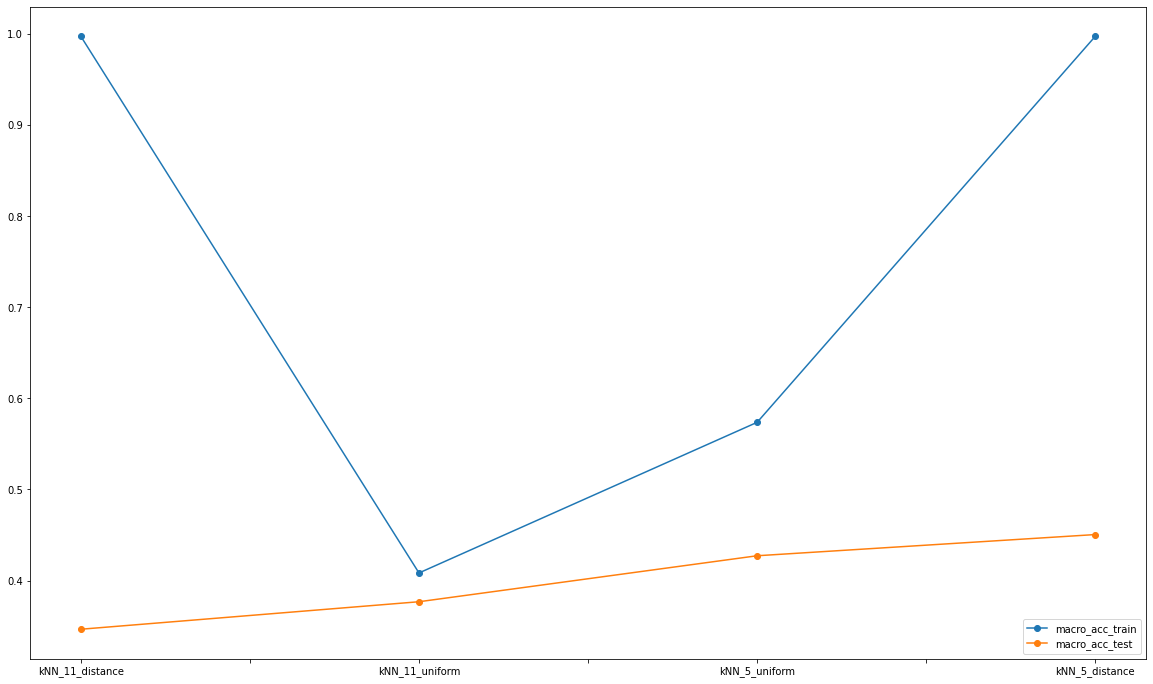

In [ ]:
knnc_scores_df[['macro_acc_train','macro_acc_test']].sort_values('macro_acc_test').plot(marker='o');

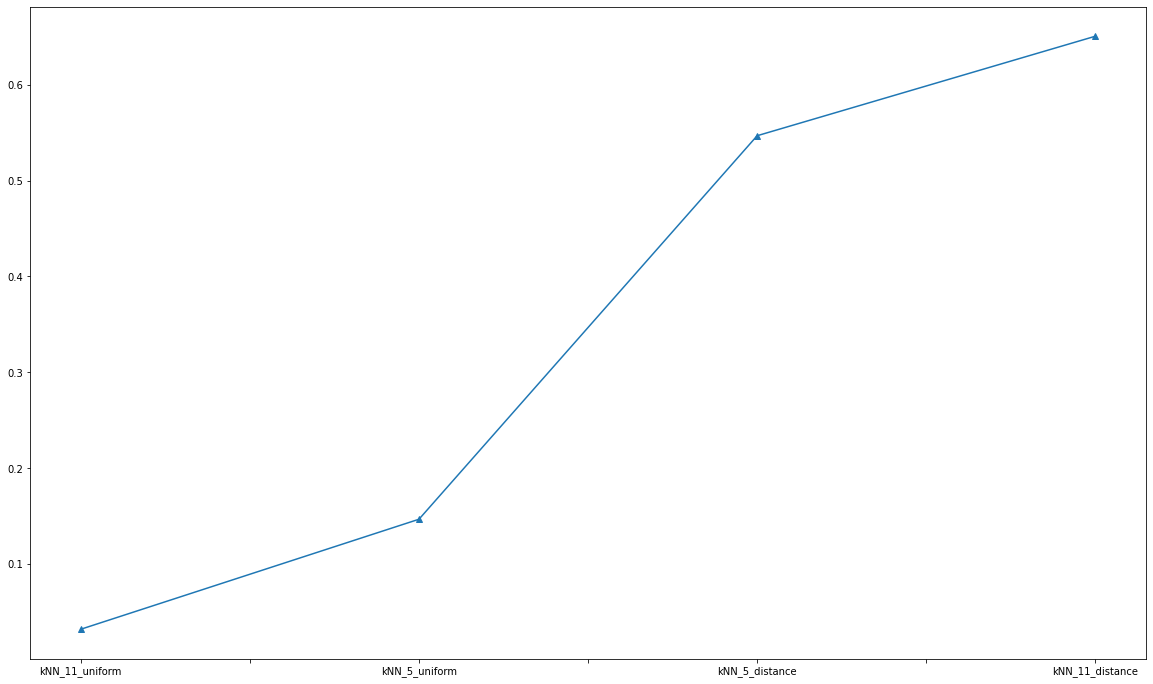

In [ ]:
(knnc_scores_df['macro_acc_train']-knnc_scores_df['macro_acc_test']).sort_values().plot(marker='^');

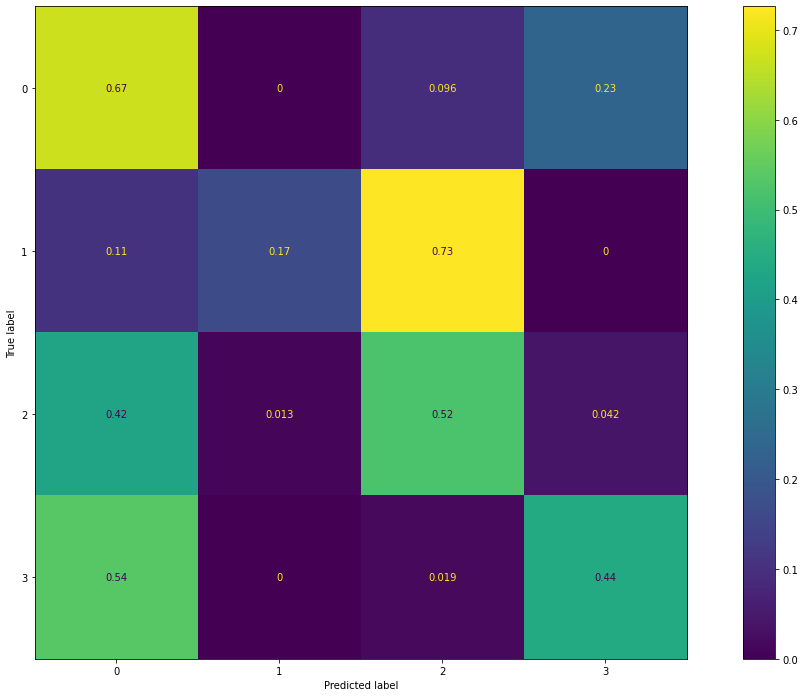

In [ ]:
cm = confusion_matrix(
    CarClass_y_test, knnc_5d.predict(CarClass_x_test), normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Interesting how a basic Knn as seen below reaches a higher accuracy where as the ones above using similar methods achieve lower scores.

We can also see a trend in the Knn model from the confusion matrix above.
the model is really good at predicting the very high price band but it is really bad at the high price band when the neighbour is set to 5 neighbours with the distance parameter

In [ ]:
knnc = KNeighborsClassifier(5, weights='distance').fit(CarClass_x_train, CarClass_y_train)
knnc.score(CarClass_x_test, CarClass_y_test)

0.822

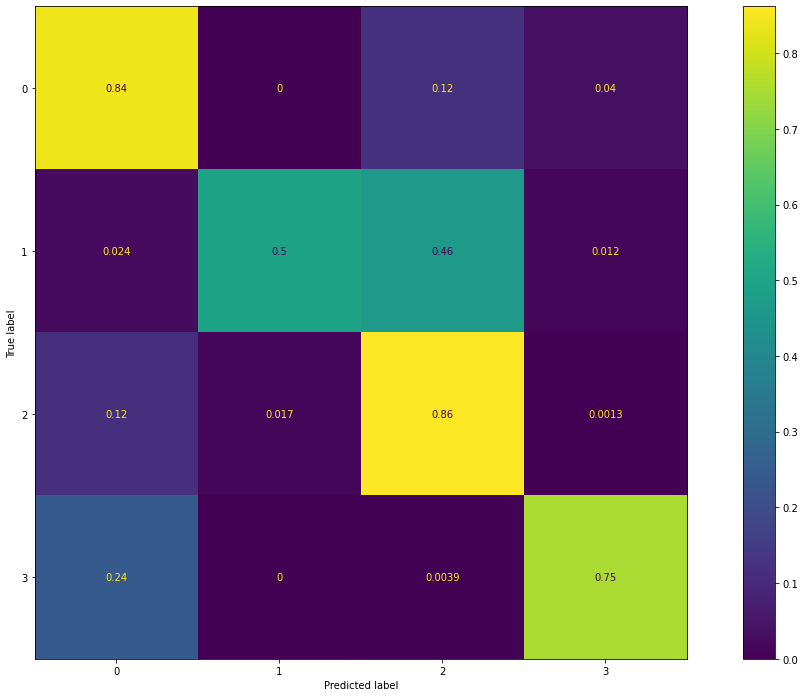

In [ ]:
cm = confusion_matrix(
    CarClass_y_test, knnc.predict(CarClass_x_test), normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Interestingly when we dont create a pipeline for the data we get better results with the KNN set to 5 neighbours with the weight being the distance

### Decison tree testing

Decison trees are a highly accurate way of prediciton as it splits each connection or causation into seperate instances, as we see from below we have a high accuracy score

In [ ]:

dtc = DecisionTreeClassifier().fit(CarClass_x_train, CarClass_y_train)
dtc.score(CarClass_x_test,CarClass_y_test)

0.825

In [ ]:
dtcD2 = DecisionTreeClassifier(max_depth= 2).fit(CarClass_x_train, CarClass_y_train)
dtcD2_acc_train = accuracy_score(CarClass_y_train, dtcD2.predict(CarClass_x_train))
dtcD2_bacc_train = balanced_accuracy_score(CarClass_y_train, dtcD2.predict(CarClass_x_train))
dtcD2_acc_test = accuracy_score(CarClass_y_test, dtcD2.predict(CarClass_x_test))
dtcD2_bacc_test = balanced_accuracy_score(CarClass_y_test, dtcD2.predict(CarClass_x_test))
dtcD2_acc_train = accuracy_score(CarClass_y_train, dtcD2.predict(CarClass_x_train))
dtcD2_bacc_train = balanced_accuracy_score(CarClass_y_train, dtcD2.predict(CarClass_x_train))
dtcD2_acc_test = accuracy_score(CarClass_y_test, dtcD2.predict(CarClass_x_test))
dtcD2_bacc_test = balanced_accuracy_score(CarClass_y_test, dtcD2.predict(CarClass_x_test))

dtcD10 = DecisionTreeClassifier(max_depth= 10).fit(CarClass_x_train, CarClass_y_train)
dtcD10_acc_train = accuracy_score(CarClass_y_train, dtcD10.predict(CarClass_x_train))
dtcD10_bacc_train = balanced_accuracy_score(CarClass_y_train, dtcD10.predict(CarClass_x_train))
dtcD10_acc_test = accuracy_score(CarClass_y_test, dtcD10.predict(CarClass_x_test))
dtcD10_bacc_test = balanced_accuracy_score(CarClass_y_test, dtcD10.predict(CarClass_x_test))
dtcD10_acc_train = accuracy_score(CarClass_y_train, dtcD10.predict(CarClass_x_train))
dtcD10_bacc_train = balanced_accuracy_score(CarClass_y_train, dtcD10.predict(CarClass_x_train))
dtcD10_acc_test = accuracy_score(CarClass_y_test, dtcD10.predict(CarClass_x_test))
dtcD10_bacc_test = balanced_accuracy_score(CarClass_y_test, dtcD10.predict(CarClass_x_test))

dtcD20 = DecisionTreeClassifier(max_depth= 20).fit(CarClass_x_train, CarClass_y_train)
dtcD20_acc_train = accuracy_score(CarClass_y_train, dtcD20.predict(CarClass_x_train))
dtcD20_bacc_train = balanced_accuracy_score(CarClass_y_train, dtcD20.predict(CarClass_x_train))
dtcD20_acc_test = accuracy_score(CarClass_y_test, dtcD20.predict(CarClass_x_test))
dtcD20_bacc_test = balanced_accuracy_score(CarClass_y_test, dtcD20.predict(CarClass_x_test))
dtcD20_acc_train = accuracy_score(CarClass_y_train, dtcD20.predict(CarClass_x_train))
dtcD20_bacc_train = balanced_accuracy_score(CarClass_y_train, dtcD20.predict(CarClass_x_train))
dtcD20_acc_test = accuracy_score(CarClass_y_test, dtcD20.predict(CarClass_x_test))
dtcD20_bacc_test = balanced_accuracy_score(CarClass_y_test, dtcD20.predict(CarClass_x_test))


[Text(0.7726014760147601, 0.9545454545454546, 'X[6583] <= 0.5\ngini = 0.637\nsamples = 8000\nvalue = [3507, 339, 3118, 1036]'),
 Text(0.606549815498155, 0.8636363636363636, 'X[6643] <= 0.5\ngini = 0.63\nsamples = 6923\nvalue = [3339, 209, 2339, 1036]'),
 Text(0.463330258302583, 0.7727272727272727, 'X[6640] <= 0.5\ngini = 0.652\nsamples = 5533\nvalue = [2259, 209, 2171, 894]'),
 Text(0.3547047970479705, 0.6818181818181818, 'X[6631] <= 0.5\ngini = 0.626\nsamples = 5008\nvalue = [2078, 209, 2171, 550]'),
 Text(0.24907749077490776, 0.5909090909090909, 'X[6642] <= 0.5\ngini = 0.581\nsamples = 4351\nvalue = [1785, 209, 2161, 196]'),
 Text(0.17343173431734318, 0.5, 'X[6644] <= 0.5\ngini = 0.543\nsamples = 3728\nvalue = [1340, 209, 2122, 57]'),
 Text(0.1070110701107011, 0.4090909090909091, 'X[6627] <= 0.5\ngini = 0.484\nsamples = 2793\nvalue = [696, 209, 1870, 18]'),
 Text(0.05904059040590406, 0.3181818181818182, 'X[6626] <= 0.5\ngini = 0.403\nsamples = 2235\nvalue = [334, 209, 1681, 11]'),
 T

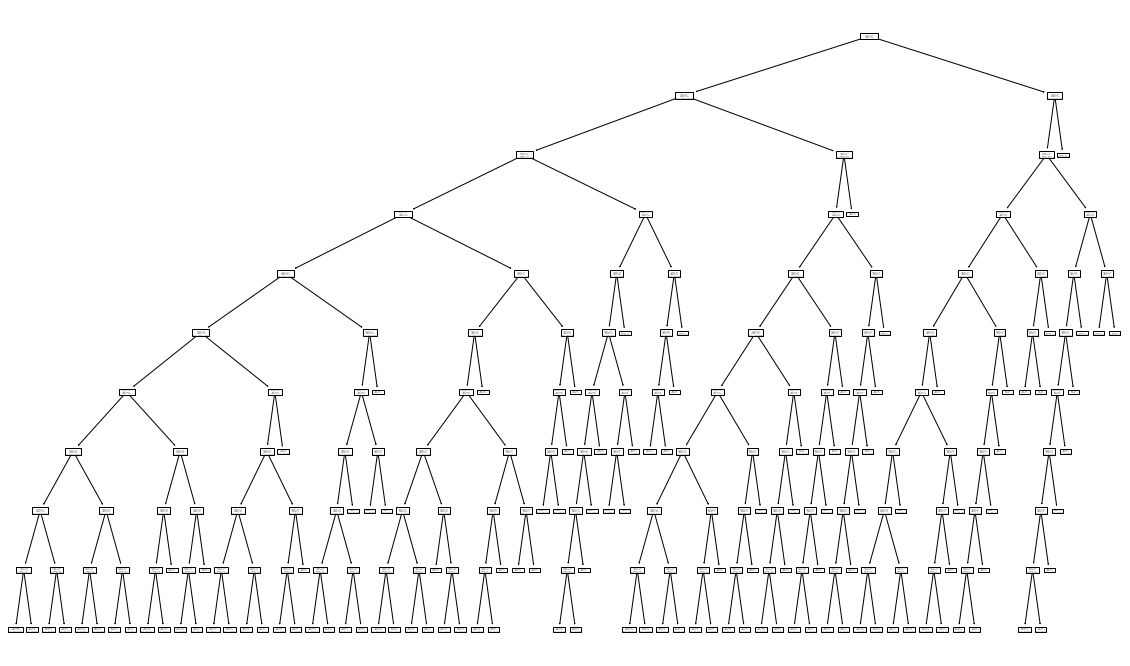

In [ ]:
tree.plot_tree(dtcD10)

In [ ]:
dtc_scores_df = pd.DataFrame(
    dict(
        micro_acc_train=[dtcD2_acc_train, dtcD10_acc_train, dtcD20_acc_train],
        macro_acc_train=[dtcD2_bacc_train, dtcD10_bacc_train, dtcD20_bacc_train],
        micro_acc_test=[dtcD2_acc_test, dtcD10_acc_test, dtcD20_acc_test],
        macro_acc_test=[dtcD2_bacc_test, dtcD10_bacc_test, dtcD20_bacc_test]
    ), 
    index=['DecisionTree_MaxDepth_2', 'DecisionTree_MaxDepth_10', 'DecisionTree_MaxDepth_20']
)
dtc_scores_df.sort_values('macro_acc_test', ascending=False)

micro_acc_train  ...  macro_acc_test
DecisionTree_MaxDepth_20          0.92500  ...        0.752244
DecisionTree_MaxDepth_10          0.82900  ...        0.721781
DecisionTree_MaxDepth_2           0.52025  ...        0.296182

[3 rows x 4 columns]

as we increase the depth of the tree allowing for more instances of the data to be annalysed we can see that the accuracy of the model imcreases dramatically 

### SVM
The margin created by a support vector machine is what allows it to predict the output of the data. as we can see it is a accurate model however it does take a long time to run and therefore it is not effeicent in real world use

In [ ]:

svc = SVC().fit(CarClass_x_train,CarClass_y_train)
svc.score(CarClass_x_test,CarClass_y_test)

0.84

In [ ]:
svc = SVC(C=1)
svc = Pipeline([('scaler', MinMaxScaler()), ('model', svc)])
svc.fit(CarClass_x_train, CarClass_y_train)
svc_acc_train = accuracy_score(CarClass_y_train, svc.predict(CarClass_x_train))
svc_bacc_train = balanced_accuracy_score(CarClass_y_train, svc.predict(CarClass_x_train))
svc_acc_test = accuracy_score(CarClass_y_test, svc.predict(CarClass_x_test))
svc_bacc_test = balanced_accuracy_score(CarClass_y_test, svc.predict(CarClass_x_test))

svc_scores_df = pd.DataFrame(
    dict(
        micro_acc_train=svc_acc_train,
        macro_acc_train=svc_bacc_train,
        micro_acc_test=svc_acc_test,
        macro_acc_test=svc_bacc_test
    ), 
    index=['SVC 1']
)
svc_scores_df

micro_acc_train  macro_acc_train  micro_acc_test  macro_acc_test
SVC 1          0.86375         0.803569            0.84        0.746676

I will avoid using logistical regression as it is used to classify in a binary sense, i.e. dead or alive and since we have four bands of price this is a method that does not fit without task

In [ ]:
svc = SVC(C=10)
svc = Pipeline([('scaler', MinMaxScaler()), ('model', svc)])
svc.fit(CarClass_x_train, CarClass_y_train)
svc_acc_train = accuracy_score(CarClass_y_train, svc.predict(CarClass_x_train))
svc_bacc_train = balanced_accuracy_score(CarClass_y_train, svc.predict(CarClass_x_train))
svc_acc_test = accuracy_score(CarClass_y_test, svc.predict(CarClass_x_test))
svc_bacc_test = balanced_accuracy_score(CarClass_y_test, svc.predict(CarClass_x_test))



In [ ]:
svc_scores10_df = pd.DataFrame(
    dict(
        micro_acc_train=svc_acc_train,
        macro_acc_train=svc_bacc_train,
        micro_acc_test=svc_acc_test,
        macro_acc_test=svc_bacc_test
    ), 
    index=['SVC 10']
)
svc_scores10_df

micro_acc_train  macro_acc_train  micro_acc_test  macro_acc_test
SVC 10         0.997375         0.997251          0.8305        0.747009

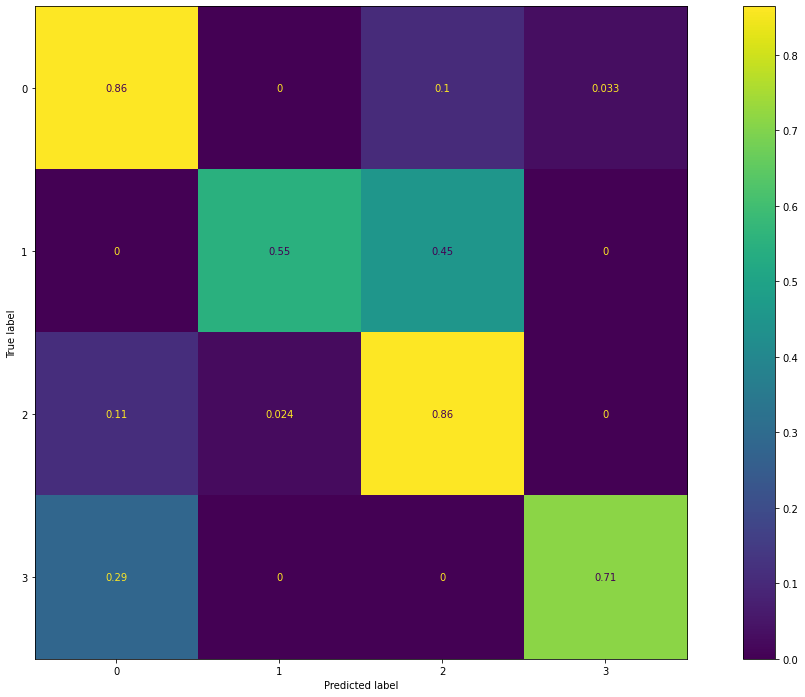

In [ ]:
cm = confusion_matrix(
    CarClass_y_test, svc.predict(CarClass_x_test), normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

as we know from the inital data, the most common price bands are very high and medium classifications. from the above SVM confusion matrix, the SVM has a more than 50% true-positive prediciton, and our two main columns are the two highest scoring areas in this matrix

### Naive Bayes

bayes method uses a degree of assumption in its learning to help predict accuratly which is why I chose to incoorperate it into the modelling

In [ ]:

gnb=GaussianNB()
gnb.fit(CarClass_x_train, CarClass_y_train)
print(gnb.score(CarClass_x_train, CarClass_y_train))

gnb.fit(CarClass_x_test,CarClass_y_test)
GNBYPRED = gnb.predict(CarClass_x_test)
print(GNBYPRED)
print(gnb.score(CarClass_x_test,CarClass_y_test))

0.82025
['high' 'medium' 'high' ... 'medium' 'high' 'very high']
0.8965


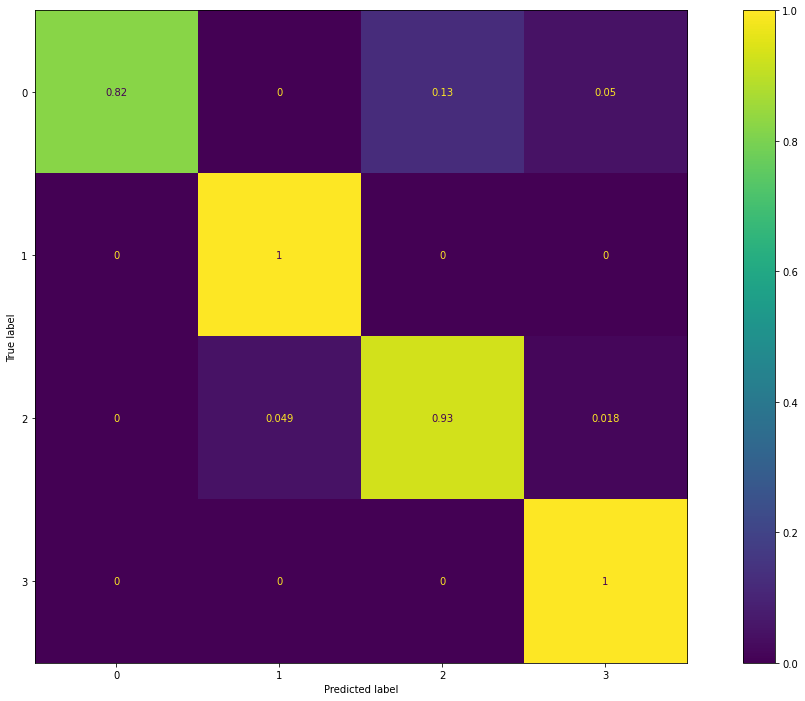

In [ ]:
cm = confusion_matrix(
    CarClass_y_test, gnb.predict(CarClass_x_test), normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
nb_acc_train = accuracy_score(CarClass_y_train, gnb.predict(CarClass_x_train))
nb_bacc_train = balanced_accuracy_score(CarClass_y_train, gnb.predict(CarClass_x_train))
nb_acc_test = accuracy_score(CarClass_y_test, gnb.predict(CarClass_x_test))
nb_bacc_test = balanced_accuracy_score(CarClass_y_test, gnb.predict(CarClass_x_test))



In [ ]:
nb_scores = pd.DataFrame(
    dict(
        micro_acc_train=nb_acc_train,
        macro_acc_train=nb_bacc_train,
        micro_acc_test=nb_acc_test,
        macro_acc_test=nb_bacc_test
    ), 
    index=['Naive Bayes']
)
nb_scores

micro_acc_train  macro_acc_train  micro_acc_test  macro_acc_test
Naive Bayes         0.439875         0.582796          0.8965        0.939149

By far Naive Bayes produced the most accurate test macro score with it hitting over 90% meaning this model is by far the best choice

In [ ]:
# stack the five DataFrames (compatible columns)
scores_df = pd.concat(
    [
        dummyc_scores_df, knnc_scores_df, dtc_scores_df, svc_scores_df, svc_scores10_df, nb_scores
    ],
    axis='rows'
)
scores_df.sort_values('macro_acc_test', ascending=False)

micro_acc_train  ...  macro_acc_test
Naive Bayes                      0.439875  ...        0.939149
DecisionTree_MaxDepth_20         0.925000  ...        0.752244
SVC 10                           0.997375  ...        0.747009
SVC 1                            0.863750  ...        0.746676
DecisionTree_MaxDepth_10         0.829000  ...        0.721781
kNN_5_distance                   0.997625  ...        0.450416
kNN_5_uniform                    0.680625  ...        0.427158
kNN_11_uniform                   0.564750  ...        0.376700
kNN_11_distance                  0.997625  ...        0.346513
DecisionTree_MaxDepth_2          0.520250  ...        0.296182
Dummy                            0.438375  ...        0.250000

[11 rows x 4 columns]

# Regression
Regression is hte method for machine learning using numerical and quantitative data. this is used in our context for getting exact prices and figuring out the varience of each model. 

## Data Preperation and cleaning

In [ ]:
CarDataReg.head()

public_reference  mileage reg_code  ... fuel_type               make_model age
0   202010014440649  31534.0       17  ...    Petrol             MINI - Hatch   5
1   202010155026725  52023.0       66  ...    Diesel        Volkswagen - Golf   6
2   202008142485309  29500.0       12  ...    Petrol  Mercedes-Benz - C Class  10
3   202009183894045  35300.0       18  ...    Petrol         Vauxhall - Corsa   4
4   202010014441671  47299.0       65  ...    Diesel         Nissan - Qashqai   6

[5 rows x 14 columns]

In [ ]:
print(CarDataReg['mileage'].value_counts(dropna=False))
print(CarDataReg['vehicle_condition'].value_counts(dropna=False))
print(CarDataReg['year_of_registration'].value_counts(dropna=False))
print(CarDataReg['crossover_car_and_van'].value_counts(dropna=False))
print(CarDataReg['fuel_type'].value_counts(dropna=False))
print(CarDataReg['age'].value_counts(dropna=False))


10.0        537
60000.0     450
50000.0     431
80000.0     392
40000.0     391
           ... 
29559.0       1
130893.0      1
51120.0       1
65686.0       1
33952.0       1
Name: mileage, Length: 42439, dtype: int64
USED    96269
Name: vehicle_condition, dtype: int64
2017.0    19040
2016.0    12459
2019.0     9687
2018.0     8488
2015.0     7907
2014.0     6693
2020.0     6196
2013.0     5518
2012.0     4532
2011.0     3715
2010.0     3016
2009.0     2324
2008.0     1772
2007.0     1642
2006.0     1045
2005.0      784
2004.0      549
2003.0      382
2002.0      221
2001.0      107
2000.0       61
1999.0       40
1997.0       18
1998.0       15
1994.0       15
1995.0       12
1996.0        7
1990.0        6
1992.0        4
1989.0        3
1993.0        3
1991.0        2
1988.0        1
1986.0        1
1983.0        1
1970.0        1
1963.0        1
1962.0        1
Name: year_of_registration, dtype: int64
False    96269
Name: crossover_car_and_van, dtype: int64
Petrol    54805
Diesel 

In [ ]:
print(CarDataReg['standard_make'].value_counts(dropna=False))
print(CarDataReg['standard_model'].value_counts(dropna=False))
print(CarDataReg['body_type'].value_counts(dropna=False))

BMW              16585
Mercedes-Benz    16174
Volkswagen       14753
Vauxhall         13529
Nissan            9953
Audi              8917
MINI              5363
Kia               3519
Renault           2763
Fiat              2754
Toyota            1959
Name: standard_make, dtype: int64
Golf        8975
Corsa       7876
C Class     6818
3 Series    6727
1 Series    6449
Qashqai     5994
Polo        5778
Astra       5653
Hatch       5363
A Class     5361
A3          5246
E Class     3995
Juke        3959
A1          3671
Sportage    3519
5 Series    3409
Clio        2763
500         2754
Yaris       1959
Name: standard_model, dtype: int64
Hatchback    59227
Saloon       14235
SUV          13202
Estate        6095
Coupe         3510
Name: body_type, dtype: int64


Like classification I will be removing the same columns I deem to be irrelevant or useless to helping the models for the same reasons as stated earlier

In [ ]:
CarDataReg = CarDataReg.drop(columns = ['make_model', 'crossover_car_and_van' ,'public_reference', 'reg_code','vehicle_condition', 'standard_colour'])

In [ ]:
CarDataReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96269 entries, 0 to 96268
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mileage               96247 non-null  float64
 1   standard_make         96269 non-null  object 
 2   standard_model        96269 non-null  object 
 3   year_of_registration  96269 non-null  float64
 4   price                 96269 non-null  int64  
 5   body_type             96269 non-null  object 
 6   fuel_type             96269 non-null  object 
 7   age                   96269 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.9+ MB


As we have strings for each make and model which do have an effect on the price of the car I needed a way to represent them numerically. to do so I replaced each instance with a number as seen below. this way we can still see the effect the manufacter has on the price of a vehicle 

In [ ]:
CarDataReg = CarDataReg.replace({'fuel_type' : {'Diesel' : 0, 'Petrol' : 1},
                                 'body_type' :{'Hatchback' : 0, 'Saloon' : 1, 'SUV' : 2, 'Estate' : 3, 'Coupe' : 4},
                                 'standard_make' : {'BMW' : 0, 'Mercedes-Benz' : 1, 'Volkswagen' : 2, 'Vauxhall' : 3, 'Nissan' : 4, 'Audi' : 5,
                                                    'MINI' : 6, 'Kia' : 7, 'Renault' : 8, 'Fiat' : 9, 'Toyota' : 10 },
                                 'standard_model' : {'Golf' : 0, 'Corsa' : 1, 'C Class' : 2, '3 Series' : 3, '1 Series' : 4, 'Qashqai' : 5,
                                                     'Polo' : 6, 'Astra' : 7, 'Hatch' : 8, 'A Class' : 9, 'A3' : 10, 'E Class' : 11,
                                                     'Juke' : 12, 'A1' : 13, 'Sportage' : 14, '5 Series' : 15, 'Clio' : 16, '500' : 17, 'Yaris' : 18}
                                 })

In [ ]:
CarDataReg.head()

mileage  standard_make  standard_model  ...  body_type  fuel_type  age
0  31534.0              6               8  ...          0          1    5
1  52023.0              2               0  ...          3          0    6
2  29500.0              1               2  ...          1          1   10
3  35300.0              3               1  ...          0          1    4
4  47299.0              4               5  ...          2          0    6

[5 rows x 8 columns]

Again ttaking a sample of 10% of the data. I believe 30% is normally the best way to do it but as we have such a large amount of data. 10,000 seems to be a good number to generate accurate results

In [ ]:
RegDat = CarDataReg.sample(10000)
CarReg_y = RegDat['price']

In [ ]:
CarReg_x = RegDat.drop(columns = ['price'])
CarReg_x['mileage'].fillna(0, inplace = True)
CarReg_x_train, CarReg_x_test, CarReg_y_train, CarReg_y_test = train_test_split(CarReg_x, CarReg_y, test_size=0.20, random_state= 66)
CarReg_x_train.shape, CarReg_y_train.shape, CarReg_x_test.shape, CarReg_y_test.shape

((8000, 7), (8000,), (2000, 7), (2000,))

## Models

### Linear Regression

Starting with Linear Regression(LGR), this model is a staple in regression processing as it works very well with numbers to produce accurate results

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
model = LinearRegression()
model.fit(CarReg_x_train, CarReg_y_train)
model.score(CarReg_x_test, CarReg_y_test)
df_Mileage =CarReg_x[CarReg_x['mileage']== 'Mileage']
df_Age =CarReg_x[CarReg_x['age'] == 'Age']
m,b = np.polyfit(CarReg_x['mileage'],CarReg_y, 1)

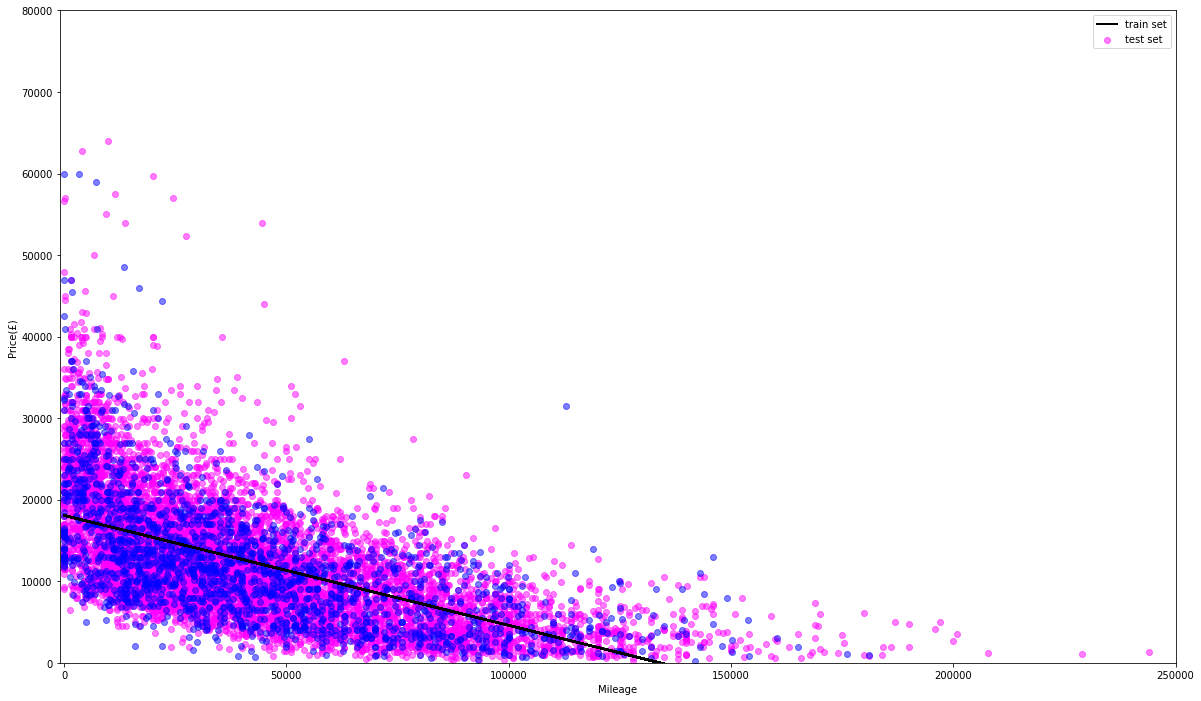

In [ ]:
y_Pred = model.predict(CarReg_x_test)
model = make_pipeline(
    PolynomialFeatures(2, include_bias=False), 
    LinearRegression()
)
model.fit(CarReg_x_train,CarReg_y_train)
plt.scatter(x=CarReg_x_train['mileage'], y=CarReg_y_train, color="magenta", alpha = 0.5)
plt.scatter(CarReg_x_test['mileage'], CarReg_y_test, color="blue", alpha = 0.5)
plt.plot(CarReg_x['mileage'], m*CarReg_x['mileage']+b, linewidth =2, color = 'black')
plt.legend(labels=['train set', 'test set'])
plt.ylabel("Price(£)")
plt.xlabel("Mileage")
plt.xlim(-1000,250000)
plt.ylim(0,80000)
plt.rcParams['figure.figsize'] = (20,12)

In [ ]:
from sklearn.metrics import(
    mean_absolute_error,
    mean_squared_error
)
from functools import partial
RMSE = partial(mean_squared_error, squared=False)
LGRM = mean_absolute_error(CarReg_y_test, model.predict(CarReg_x_test))
LGRMS = RMSE(CarReg_y_test, model.predict(CarReg_x_test))
print(model.score(CarReg_x_test, CarReg_y_test))

0.7480749215298754


### KNN Regression

KNN is used in regression the same way as classification by comparing neighbours and coming up with the best value. this system I believe is a really good process in theory

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
Reg_knn = KNeighborsRegressor(5).fit(CarReg_x_train, CarReg_y_train)
print("KNN with 5 neighbours")
RKNR = RMSE(CarReg_y_test, Reg_knn.predict(CarReg_x_test))
RKNM = mean_absolute_error(CarReg_y_test, Reg_knn.predict(CarReg_x_test))
print('Score is = ' ,Reg_knn.score(CarReg_x_test, CarReg_y_test))

Reg_knn10 = KNeighborsRegressor(10).fit(CarReg_x_train, CarReg_y_train)
print("KNN with 10 neighbours")
RKNR1 = RMSE(CarReg_y_test, Reg_knn10.predict(CarReg_x_test))
RKNM1 =mean_absolute_error(CarReg_y_test, Reg_knn10.predict(CarReg_x_test))
print('Score is = ' ,Reg_knn10.score(CarReg_x_test, CarReg_y_test))
Reg_knn15 = KNeighborsRegressor(15).fit(CarReg_x_train, CarReg_y_train)
print("KNN with 15 neighbours")
RKNR15 = RMSE(CarReg_y_test, Reg_knn15.predict(CarReg_x_test))
RKNM15 =mean_absolute_error(CarReg_y_test, Reg_knn15.predict(CarReg_x_test))
print('Score is = ' ,Reg_knn15.score(CarReg_x_test, CarReg_y_test))
Reg_knn20 = KNeighborsRegressor(20).fit(CarReg_x_train, CarReg_y_train)
print("KNN with 20 neighbours")
RKNR20 =RMSE(CarReg_y_test, Reg_knn20.predict(CarReg_x_test))
RKNM20 =mean_absolute_error(CarReg_y_test, Reg_knn20.predict(CarReg_x_test))
print('Score is = ' ,Reg_knn20.score(CarReg_x_test, CarReg_y_test))
Reg_knn25 = KNeighborsRegressor(25).fit(CarReg_x_train, CarReg_y_train)
print("KNN with 25 neighbours")
RKNR25 =RMSE(CarReg_y_test, Reg_knn25.predict(CarReg_x_test))
RKNM25 =mean_absolute_error(CarReg_y_test, Reg_knn25.predict(CarReg_x_test))
print('Score is = ' ,Reg_knn25.score(CarReg_x_test, CarReg_y_test))

Reg_knn100 = KNeighborsRegressor(500).fit(CarReg_x_train, CarReg_y_train)
print("KNN with 100 neighbours")
RKNR100 =RMSE(CarReg_y_test, Reg_knn100.predict(CarReg_x_test))
RKNM100 =mean_absolute_error(CarReg_y_test, Reg_knn100.predict(CarReg_x_test))
print('Score is = ' ,Reg_knn100.score(CarReg_x_test, CarReg_y_test))

KNN with 5 neighbours
Score is =  0.397331656830918
KNN with 10 neighbours
Score is =  0.4310417718723857
KNN with 15 neighbours
Score is =  0.4415371685958306
KNN with 20 neighbours
Score is =  0.4293275786981625
KNN with 25 neighbours
Score is =  0.4311737195508031
KNN with 100 neighbours
Score is =  0.42125349012364266


The scores from this model, I.E the accuracy is produced above and as we can see no matter the increment of how mant neighbours to compare to the method cannot surpass a 44% accuracy. meanining it is better as a classification model

### Decision Tree Regression

Using decision trees always seems like a great option. The below decision trees expand on depth from 5 to 15 to see how this effects the accuracy and varience in the prediciton 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth =5 ,random_state = 0)

regressor.fit(CarReg_x_train, CarReg_y_train)
print(regressor.score(CarReg_x_test,CarReg_y_test))
DTR = RMSE(CarReg_y_test, regressor.predict(CarReg_x_test))
DTM =mean_absolute_error(CarReg_y_test, regressor.predict(CarReg_x_test))
tree10 = DecisionTreeRegressor(max_depth =10 ,random_state = 0)

tree10.fit(CarReg_x_train, CarReg_y_train)
print(tree10.score(CarReg_x_test,CarReg_y_test))
DTR10 = RMSE(CarReg_y_test, tree10.predict(CarReg_x_test))
DTM10 =mean_absolute_error(CarReg_y_test, tree10.predict(CarReg_x_test))
tree15 = DecisionTreeRegressor(max_depth =15 ,random_state = 0)

tree15.fit(CarReg_x_train, CarReg_y_train)
print(tree15.score(CarReg_x_test,CarReg_y_test))
DTR15 = RMSE(CarReg_y_test, tree15.predict(CarReg_x_test))
DTM15 = mean_absolute_error(CarReg_y_test, tree15.predict(CarReg_x_test))

0.7680526696718744
0.817716912730469
0.7831062164859868


all three of these trees are what I would deem as succesful, the tree with a max depth of 10 being the most accurate with a score of over 82%

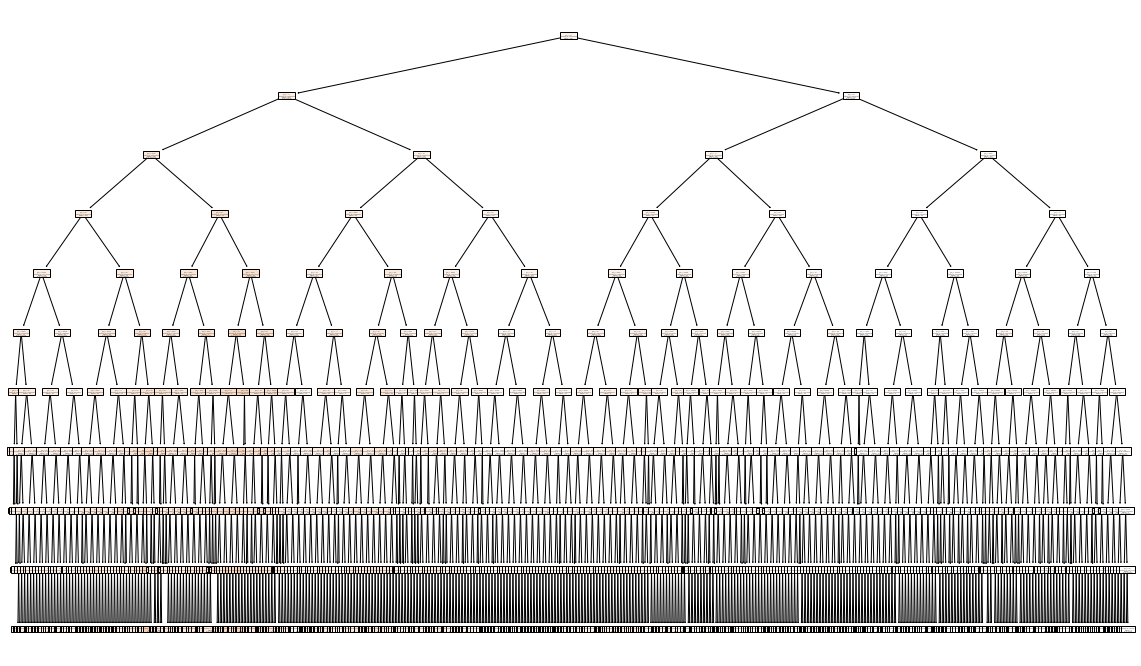

In [ ]:
from sklearn import tree


_ = tree.plot_tree(tree10, filled = True)
plt.rcParams['figure.figsize'] = (200,120)

### Random Forest

A random forest takes the success of a decision tree and builds upon it by creating multiple trees in different ways and comparing outputs

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state= 66)
rf.fit(CarReg_x_train, CarReg_y_train)

RandomForestRegressor(n_estimators=1000, random_state=66)

In [ ]:
print(rf.score(CarReg_x_test, CarReg_y_test))
RFR = RMSE(CarReg_y_test, rf.predict(CarReg_x_test))
RFM = mean_absolute_error(CarReg_y_test, rf.predict(CarReg_x_test))

0.8510723450109409


This by far is the highest accuracy score we have produced in regression at 85%

In [ ]:


_ = tree.plot_tree(rf.estimators_[0], filled = True)
plt.rcParams['figure.figsize'] = (200,120)

## Validation

This is the seciton where we compare the mean absolute error and the mean square error. these will show us how far off on average the algorithms are. for example if the output it 4000 that means the value predicted on average is £4000 too much or £4000 to little

In [ ]:
LGR_scores = pd.DataFrame(
    dict(
        RMSE = LGRMS,
        MSE = LGRM
        
    ), 
    index=['Linear Regression']
)


In [ ]:
KNN_scores= pd.DataFrame(
    dict(
        RMSE = [RKNR, RKNR1, RKNR15, RKNR20, RKNR25, RKNR100],
        MSE = [RKNM, RKNM1, RKNM15,RKNM20,RKNM25, RKNM100]
        
    ), 
    index=['KNN Regression', 'KNN Regression 10', 'KNN Regression 15', 'KNN Regression 20', 'KNN Regression 25', 'KNN Regression 100']
)

In [ ]:
DTR_Scores =pd.DataFrame(
    dict(
        RMSE = [DTR, DTR10, DTR15],
        MSE = [DTM, DTR10, DTR15]
        
    ), 
    index=['DT Regression', 'DT Regression 10', 'DT Regression 15']
)



In [ ]:

RF_scores = pd.DataFrame(
    dict(
        RMSE = RFR,
        MSE = RFM
        
    ), 
    index=['RF Regression']
)


In [ ]:
scoresR_df = pd.concat(
    [
        LGR_scores, KNN_scores, DTR_Scores, RF_scores
    ],
    axis='rows'
)
scoresR_df.sort_values('RMSE', ascending=True)

RMSE          MSE
RF Regression       2897.231937  1710.416076
DT Regression 10    3205.300683  3205.300683
DT Regression 15    3496.384133  3496.384133
DT Regression       3615.682418  2448.140551
Linear Regression   3768.176958  2652.440363
KNN Regression 15   5610.385782  4148.315300
KNN Regression 25   5662.202731  4218.054200
KNN Regression 10   5662.859409  4159.873750
KNN Regression 20   5671.383703  4217.275250
KNN Regression 100  5711.363225  4294.346354
KNN Regression      5828.204449  4237.822400

as we can see from this table of each models RMSE and MAE, the random forest is not only 85% accurate but it also has the lowest varience, the mean square being £2897 inaccurate and the mean absolute being £1710 inaccurate, a discrepence that is acceptable as you can never fully understand the value of a vehicle untill you can see it in person and see damages that arent advertise, it also covers off for people who normally try to create a reduction in price on the forecourt

In [ ]:
scoresR_df.index.name = 'Type'

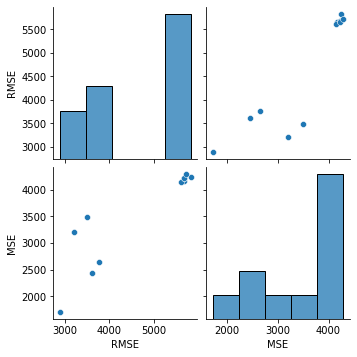

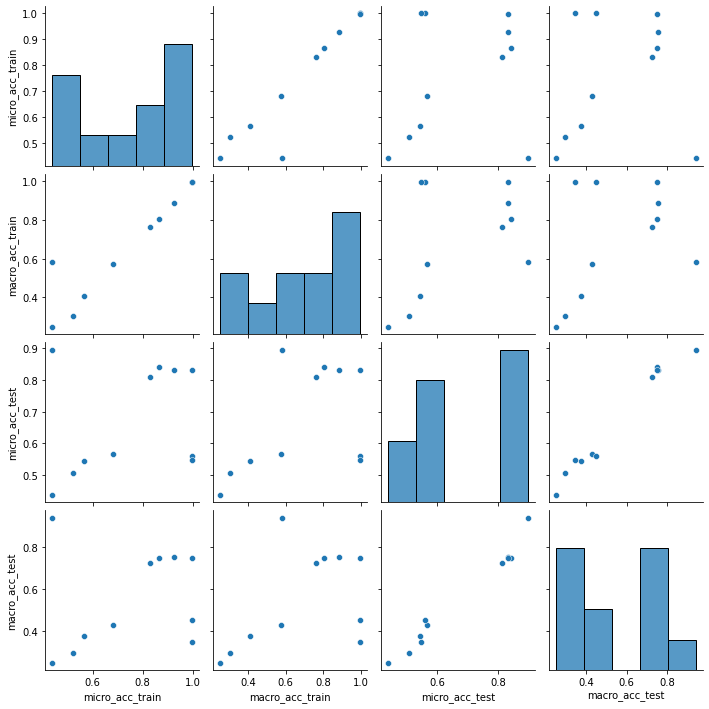

In [ ]:
sns.pairplot(scoresR_df)
plt.show()
sns.pairplot(scores_df)
plt.rcParams['figure.figsize'] = (20,12)

In [ ]:
scores_df.sort_values('macro_acc_test', ascending=False)

micro_acc_train  ...  macro_acc_test
Naive Bayes                      0.439875  ...        0.939149
DecisionTree_MaxDepth_20         0.925000  ...        0.752244
SVC 10                           0.997375  ...        0.747009
SVC 1                            0.863750  ...        0.746676
DecisionTree_MaxDepth_10         0.829000  ...        0.721781
kNN_5_distance                   0.997625  ...        0.450416
kNN_5_uniform                    0.680625  ...        0.427158
kNN_11_uniform                   0.564750  ...        0.376700
kNN_11_distance                  0.997625  ...        0.346513
DecisionTree_MaxDepth_2          0.520250  ...        0.296182
Dummy                            0.438375  ...        0.250000

[11 rows x 4 columns]

In [ ]:
scoresR_df.sort_values('RMSE', ascending=True)

RMSE          MSE
Type                                        
RF Regression       2897.231937  1710.416076
DT Regression 10    3205.300683  3205.300683
DT Regression 15    3496.384133  3496.384133
DT Regression       3615.682418  2448.140551
Linear Regression   3768.176958  2652.440363
KNN Regression 15   5610.385782  4148.315300
KNN Regression 25   5662.202731  4218.054200
KNN Regression 10   5662.859409  4159.873750
KNN Regression 20   5671.383703  4217.275250
KNN Regression 100  5711.363225  4294.346354
KNN Regression      5828.204449  4237.822400

# Conclusion of results


In conclusion, I believe the model produced here is the naive bayes model. However this does not work well in the real world as it only clasifies the price range of the vehicle so maybe if possible combining this with a random forest by cleaning the data first using naive bayes and the proccessing price through the random forest would be a good solution.

To imporve the designs of the models in a real world context more data would be better and more specifics. for example, engine size is an area that would influence a person decison in buying a car and also would influence the price. if a car has a larger enginer the chances are it will create more power and therefore be worth more money 